## Observations and Insights

In [1]:
#As time increases tumor volume decreases on Capomulin
#The heavier a mouse is the larger its tumor size is on average

## Dependencies and starter code

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from collections import defaultdict
import random

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataframe
summ_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = 'outer')
summ_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = summ_df.groupby("Drug Regimen")

avg = regimen["Tumor Volume (mm3)"].mean()
med = regimen["Tumor Volume (mm3)"].median()
var = regimen["Tumor Volume (mm3)"].var()
std = regimen["Tumor Volume (mm3)"].std()
sem_val= regimen["Tumor Volume (mm3)"].sem()
#Create summary statistics table
sum_stats = pd.DataFrame({"Mean TV": avg, "Median TV": med, "Variance TV": var, 
                          "Std Dev. TV": std, "SEM TV": sem_val})
sum_stats


,Mean TV,Median TV,Variance TV,Std Dev. TV,SEM TV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

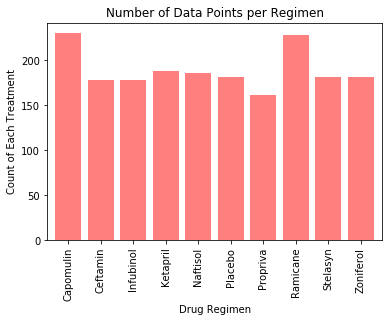

In [25]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Filter the DataFrame down to the columns to chart
mouse_count_df = regimen["Mouse ID"].count()
# Use DataFrame.plot() in order to create a bar chart of the data
mouse_count_df.plot(kind="bar", color='r', alpha=0.5, align="center", width = .8)

#Design Chart
plt.title("Number of Data Points per Regimen")
plt.ylabel("Count of Each Treatment")

plt.show()

Text(0, 0.5, 'Count of Each Treatment')

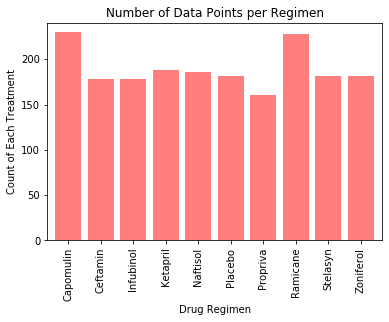

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set axis and tick locations
y_axis = regimen["Mouse ID"].count()
x_axis = np.arange(len(regimen))
tick_locations = [value for value in x_axis]
#plot graph using pyplot
plt.bar(x_axis,y_axis, color='r', alpha=0.5, align="center")
plt.xlim(-.65, len(x_axis)-.35)
plt.ylim(0,max(y_axis)+10)
plt.title("Number of Data Points per Regimen")
plt.xticks(tick_locations, y_axis.index.values, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Each Treatment")

## Pie plots

Text(0.5, 1.0, 'Amount of Male vs. Female Mice')

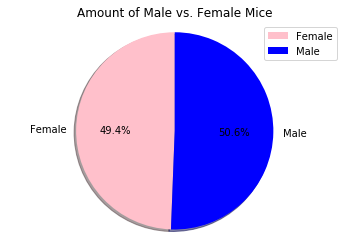

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Count number of female and male mice in the dataset
female = summ_df.loc[summ_df["Sex"]=="Female"]
fem_count = female["Sex"].count()
male = summ_df.loc[summ_df["Sex"]=="Male"]
male_count = male["Sex"].count()
#Generate labels
gender = ["Female","Male"]
#Generate data
gender_count = [fem_count, male_count]
colors= ["pink", "blue"]
#Plot pie chart using pandas
genders_df = pd.DataFrame({"": [fem_count,male_count]}, index = gender)

plot = genders_df.plot.pie(subplots = True, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")
plt.title("Amount of Male vs. Female Mice")


Text(0.5, 1.0, 'Amount of Male vs. Female Mice')

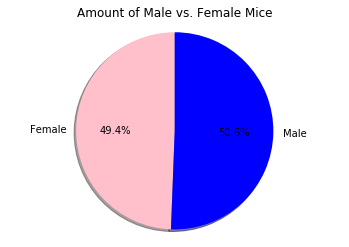

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female = summ_df.loc[summ_df["Sex"]=="Female"]
fem_count = female["Sex"].count()
male = summ_df.loc[summ_df["Sex"]=="Male"]
male_count = male["Sex"].count()

gender = ["Female","Male"]
gender_count = [fem_count, male_count]
colors= ["pink", "blue"]

plt.pie(gender_count, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Amount of Male vs. Female Mice")

## Quartiles, outliers and boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Capomulin, Ramicane, Infubinol, and Ceftamin

#Finds the last (final) tumor volume for each mouse
fin_tv = summ_df.drop_duplicates("Mouse ID", keep = 'last')
#Only look at 4 most promising treatments
capo_data = fin_tv.loc[(fin_tv["Drug Regimen"]=="Capomulin"),:] 
rami_data = fin_tv.loc[(fin_tv["Drug Regimen"]=="Ramicane"),:] 
ceft_data =fin_tv.loc[(fin_tv["Drug Regimen"]=="Ceftamin"),:]
infu_data =fin_tv.loc[(fin_tv["Drug Regimen"]=="Infubinol"),:]
#Calculate the IQR and quantitatively determine if there are any potential outliers for each regimen. 
capo_quart = capo_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
capo_lowerq = capo_quart[.25]
capo_upperq = capo_quart[.75]
capo_iqr = capo_upperq-capo_lowerq
capo_lower_bound = capo_lowerq -(1.5*capo_iqr)
capo_upper_bound = capo_upperq +(1.5*capo_iqr)

rami_quart = rami_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
rami_lowerq = rami_quart[.25]
rami_upperq = rami_quart[.75]
rami_iqr = rami_upperq-rami_lowerq
rami_lower_bound = rami_lowerq -(1.5*rami_iqr)
rami_upper_bound = rami_upperq +(1.5*rami_iqr)

ceft_quart = ceft_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceft_lowerq = ceft_quart[.25]
ceft_upperq = ceft_quart[.75]
ceft_iqr = ceft_upperq-ceft_lowerq
ceft_lower_bound = ceft_lowerq -(1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq +(1.5*ceft_iqr)

infu_quart = infu_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
infu_lowerq = infu_quart[.25]
infu_upperq = infu_quart[.75]
infu_iqr = infu_upperq-infu_lowerq
infu_lower_bound = infu_lowerq -(1.5*infu_iqr)
infu_upper_bound = infu_upperq +(1.5*infu_iqr)

#If the tumor volume is lower than lower bound and higher than the higher bound it is an outlier
capo_outlier = capo_data.loc[(capo_data['Tumor Volume (mm3)'] < capo_lower_bound) | 
                             (capo_data['Tumor Volume (mm3)'] > capo_upper_bound),"Tumor Volume (mm3)"]
rami_outlier = rami_data.loc[(rami_data['Tumor Volume (mm3)'] < rami_lower_bound) | 
                             (rami_data['Tumor Volume (mm3)'] > rami_upper_bound),"Tumor Volume (mm3)"]
ceft_outlier = ceft_data.loc[(ceft_data['Tumor Volume (mm3)'] < ceft_lower_bound) | 
                             (ceft_data['Tumor Volume (mm3)'] > ceft_upper_bound),"Tumor Volume (mm3)"]
infu_outlier = infu_data.loc[(infu_data['Tumor Volume (mm3)'] < infu_lower_bound) | 
                             (infu_data['Tumor Volume (mm3)'] > infu_upper_bound),"Tumor Volume (mm3)"]
capo_outlier = capo_outlier.reset_index()
rami_outlier = rami_outlier.reset_index()
ceft_outlier = ceft_outlier.reset_index()
infu_outlier= infu_outlier.reset_index()
#Print out outlier results
print(f"There were {len(capo_outlier)} outliers found in Capomulin dataset with values of {(capo_outlier['Tumor Volume (mm3)'].values.tolist())}")
print(f"There were {len(rami_outlier)} outliers found in Ramicane dataset with values of {(rami_outlier['Tumor Volume (mm3)'].values.tolist())}")
print(f"There were {len(ceft_outlier)} outliers found in Ceftamin dataset with values of {(ceft_outlier['Tumor Volume (mm3)'].values.tolist())}")
print(f"There were {len(infu_outlier)} outliers found in Infubinol dataset with values of {(infu_outlier['Tumor Volume (mm3)'].values.tolist())}")
#Create summary statistics dataframe
summary_df= pd.DataFrame({"IQR": [capo_iqr, rami_iqr,ceft_iqr,infu_iqr],"Lower Bound": [capo_lower_bound,rami_lower_bound,
                         ceft_lower_bound,infu_lower_bound],"Upper Bound": [capo_upper_bound,rami_upper_bound,ceft_upper_bound,
                         infu_upper_bound],"Lower Quartile": [capo_lowerq, rami_lowerq, ceft_lowerq,infu_lowerq], "Upper Quartile":
                         [capo_upperq,rami_upperq,ceft_upperq,infu_upperq]},index = ["Capomulin", "Ramicane", "Ceftamin","Infubinol"])
summary_df

There were 0 outliers found in Capomulin dataset with values of []
There were 0 outliers found in Ramicane dataset with values of []
There were 0 outliers found in Ceftamin dataset with values of []
There were 1 outliers found in Infubinol dataset with values of [36.321345799999996]


,IQR,Lower Bound,Upper Bound,Lower Quartile,Upper Quartile
Capomulin,7.781863,20.704562,51.832015,32.377357,40.159220
Ramicane,9.098537,17.912664,54.306811,31.560470,40.659006
Ceftamin,15.577752,25.355450,87.666458,48.722078,64.299830
Infubinol,11.477135,36.832905,82.741446,54.048608,65.525743


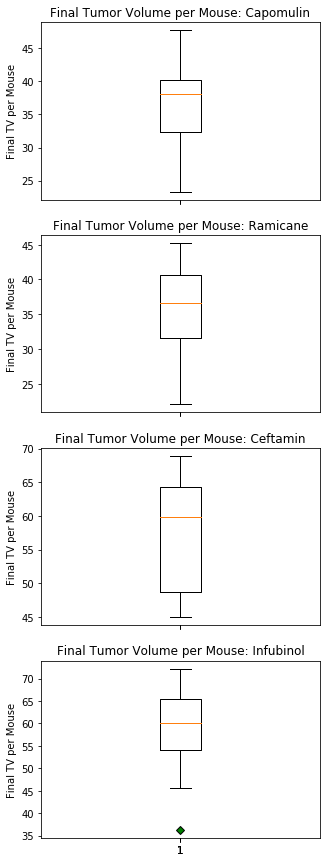

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Use this to highlight outliers
green_diamond = dict(markerfacecolor='g', marker='D')
#Create 4 plots on single figure
fig1, (ax1, ax2,ax3,ax4) = plt.subplots(4,sharex=True,figsize = (5,15))
ax1.set_title("Final Tumor Volume per Mouse: Capomulin")
ax1.set_ylabel("Final TV per Mouse")
ax1.boxplot(capo_data['Tumor Volume (mm3)'])
ax2.set_title("Final Tumor Volume per Mouse: Ramicane")
ax2.set_ylabel("Final TV per Mouse")
ax2.boxplot(rami_data['Tumor Volume (mm3)'])
ax3.set_title("Final Tumor Volume per Mouse: Ceftamin")
ax3.set_ylabel("Final TV per Mouse")
ax3.boxplot(ceft_data['Tumor Volume (mm3)'])
ax4.set_title("Final Tumor Volume per Mouse: Infubinol")
ax4.set_ylabel("Final TV per Mouse")
ax4.boxplot(infu_data['Tumor Volume (mm3)'], flierprops=green_diamond)

plt.show()

## Line and scatter plots

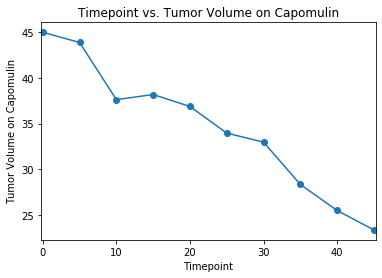

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#filter out data by Copomulin and pick a single mouse
capo_mouse = summ_df.loc[(summ_df["Drug Regimen"]=="Capomulin") & (summ_df["Mouse ID"]=="s185"),:]
#Plot data
x_axis = capo_mouse["Timepoint"]
y_axis = capo_mouse["Tumor Volume (mm3)"]
plt.xlim(min(x_axis)-.25,max(x_axis)+.25)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume on Capomulin")
plt.title("Timepoint vs. Tumor Volume on Capomulin")
plt.plot(x_axis,y_axis,marker = 'o')
plt.show()

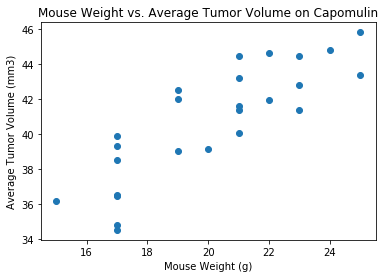

In [237]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo = summ_df.loc[summ_df["Drug Regimen"]=="Capomulin",:]
grouped_df = capo.groupby("Mouse ID")
#Each mouse weighs the same over time but tumor volume changes over time
weight = grouped_df["Weight (g)"].mean()
avg_tv = grouped_df["Tumor Volume (mm3)"].mean()

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume on Capomulin")
plt.scatter(weight,avg_tv)
plt.show()


 The correlation coefficient between mouse weight and average tumor volume is 0.842


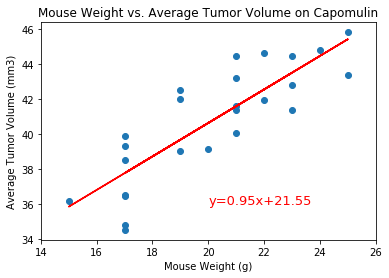

In [239]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation= st.pearsonr(weight,avg_tv)
print(f" The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],3)}")
#Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,rvalue,pvalue,stdev)= st.linregress(weight,avg_tv)
regress = weight*slope + intercept
line_eq = "y="+ str(round(slope,2)) + "x+" + str(round(intercept,2))
#Print linear regression model over scatter plot
plt.scatter(weight,avg_tv)
plt.annotate(line_eq,(20,36),fontsize = 13,color = 'red')
plt.xlim(min(weight)-1,max(weight)+1)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume on Capomulin")
plt.plot(weight,regress,"r-")